<a href="https://colab.research.google.com/github/HariTarz/Netflix_Movies_And_TV_Shows_Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Dependencies**

In [67]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [68]:
colors= ['#000000', '#320510', '#720510', '#b20510', '#c20510', '#d50913','#e50913','#f50913', '#ff3333', '#ff5b5b', '#ff8a8a', '#ffc1c1' ,'#dbdbdb', '#f7f7f7']
# nf_c_palette= sns.color_palette(colors, as_cmap=True)
sns.set_theme(style='whitegrid', palette= sns.color_palette("RdGy"))

# **Data Summary**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Reading the data set .CSV file from the google drive.
path= '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Unsupervised ML/Netflix Movies and TV Shows Clustering/dat/'
netflix_df= pd.read_csv(path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [71]:
# Viewing the data set for the first time.
# Viewing the first 5 rows.
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [72]:
# Viewing the last 5 rows.
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [73]:
# Viewing shape of the dataset.
netflix_df.shape

(7787, 12)

In [74]:
# Viewing index dtype and columns and memory usage.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [75]:
# Checking for null values.
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [76]:
# Viewing the summary of the dataset
netflix_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Checking for duplicate records
netflix_df.duplicated().sum()

0

# **Data Cleaning**

In [78]:
# Copying the actual data set to new variable
nf_df= netflix_df.copy()

In [79]:
# Checking the null value counts in 'director'
print("Number of null values in 'director':" , nf_df.director.isna().sum())
print("Percentage of null values in 'director': {:.2f}%".format(nf_df.director.isna().sum()*100/len(nf_df)))

Number of null values in 'director': 2389
Percentage of null values in 'director': 30.68%


In [80]:
# Replacing the missing values of 'director' column with the label 'Unknown'
nf_df.director.replace(np.nan, 'Unknown', inplace= True)

In [81]:
# Checking the null value counts in 'cast'
print("Number of null values in 'cast':" , nf_df.cast.isna().sum())
print("Percentage of null values in 'cast': {:.2f}%".format(nf_df.cast.isna().sum()*100/len(nf_df)))

Number of null values in 'cast': 718
Percentage of null values in 'cast': 9.22%


In [82]:
# Replacing the missing values of 'cast' column with the label 'Unknown'
nf_df.cast.replace(np.nan, 'Unknown', inplace= True)

In [83]:
# Checking the null value counts in 'country'
print("Number of null values in 'country':" , nf_df.country.isna().sum())
print("Percentage of null values in 'country': {:.2f}%".format(nf_df.country.isna().sum()*100/len(nf_df)))

Number of null values in 'country': 507
Percentage of null values in 'country': 6.51%


In [84]:
# Replacing the missing values of 'country' column with the label 'Unknown'
nf_df.country.replace(np.nan, 'Unknown', inplace= True)

In [85]:
# Formatting the 'date_added' column values
nf_df['date_added']= pd.to_datetime(nf_df.date_added)

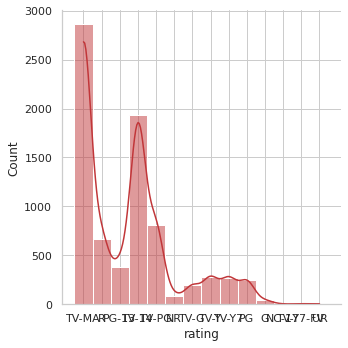

In [86]:
sns.displot(nf_df.rating, kde=True)

In [87]:
# Replacing the missing values of 'rating' column with the most frequent rating(mode).
nf_df.rating.fillna(nf_df.rating.mode()[0], inplace= True)

In [88]:
# Dropping the remaining null value columns
nf_df.dropna(inplace= True)

In [89]:
# Checking for null values
nf_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [90]:
# Viewing index dtype and columns and memory usage.
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


# **Exploratory Data Analysis**

**Analysis on 'rating'**

Text(0.5, 1.0, 'Ratings for different types of content in Netflix')

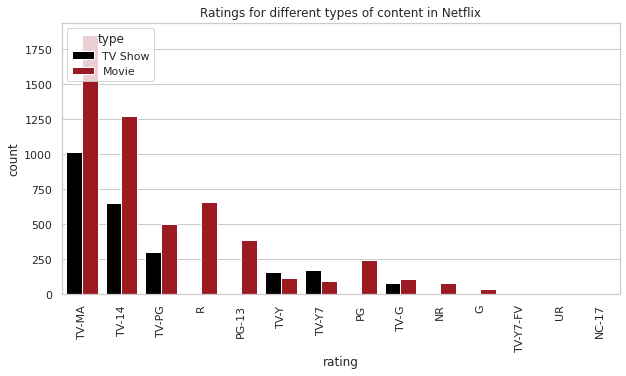

In [91]:
# Plotting different ratings for the different types of contents.
fig= plt.figure(figsize=(10,5))
sns.countplot(nf_df.rating, hue=nf_df.type, order= nf_df.rating.value_counts().index, palette= [colors[0], colors[3]])
plt.xticks(rotation=90)
plt.title('Ratings for different types of content in Netflix')

In [92]:
# Endcoding different ratings based on the age categories.
rating_dict= {'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'G': 'Kids', 'TV-G': 'Kids', 'PG': 'Kids', 'TV-PG': 'Kids', 'PG-13': 'Teens', 'TV-14': 'Teens', 'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults', 'NR': 'Adults', 'UR': 'Adults'}
nf_df['modified_rating']= nf_df.rating.map(rating_dict)

Text(0.5, 1.0, 'Counts of different types of Netflix content types')

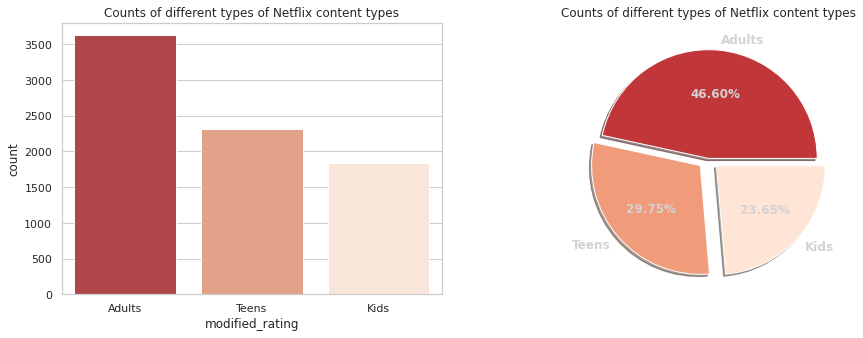

In [93]:
# Plotting different types of conents available in Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.modified_rating, ax=ax[0])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.modified_rating.value_counts(), labels = nf_df.modified_rating.value_counts().index, autopct='%1.2f%%', textprops={'color':'lightgray', 'fontsize':12, 'weight':'bold'}, explode = [0,0.1,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
# sns.countplot(mod_nf_rating_df, ax=ax[2], hue=nf_df.type, palette= ['grey', colors[12]])
# ax[2].set_title('Counts of different types of Netflix content types')

**Observations:**
* From the first plot we can observed that most of the ratings are applcable only for Movies.
* From the Netflix site reference, we come know that,
  * TV-Y, TV-Y7, G, TV-G, PG, and TV-PG rated contents are belongs to **Kids**.
  * PG-13, and TV-14 rated contents are belongs to **Teens**.
  * R, TV-MA, NC-17, NR, and UR are belongs to **Adults**.
* More than 46% contents are Adults focused, and only 23.65% for kids focused.

**Analysis on 'type'**

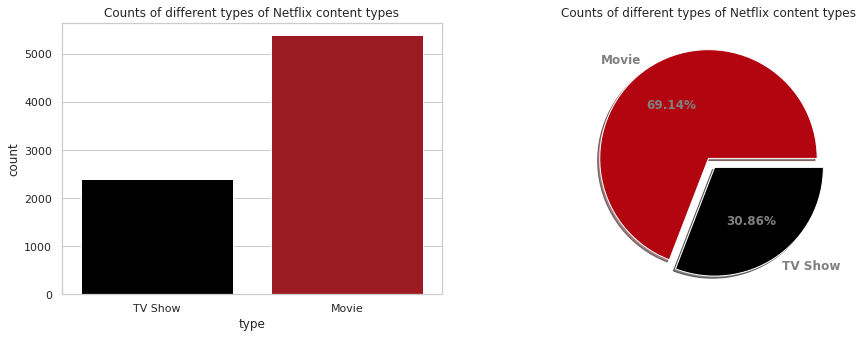

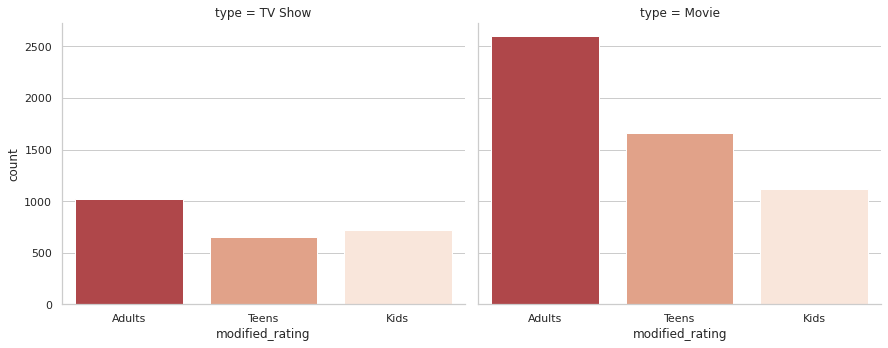

In [94]:
# Plotting different types of conents available in Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.type, ax=ax[0], palette= [colors[0], colors[3]])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.type.value_counts(), labels = nf_df.type.value_counts().index, autopct='%1.2f%%', textprops={'color':'gray', 'fontsize':12, 'weight':'bold'}, colors= [colors[3], colors[0]], explode = [0,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
sns.catplot(x='modified_rating',col='type', data=nf_df, kind='count', aspect= 1.25)

**Observations:**
* 
*

**Analysis on 'country'**

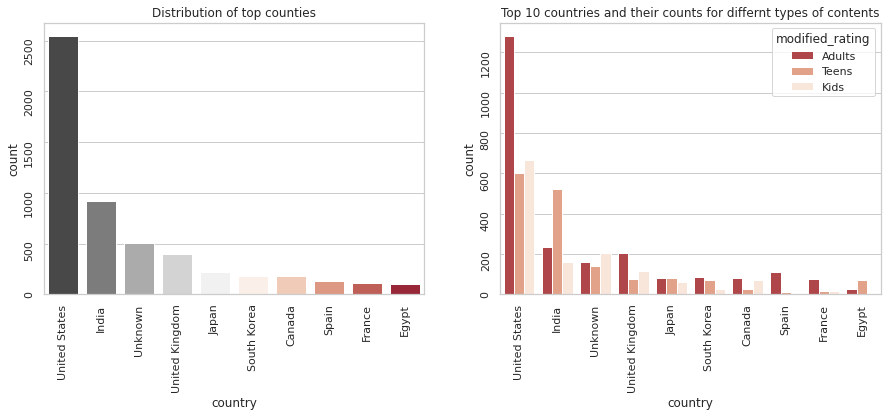

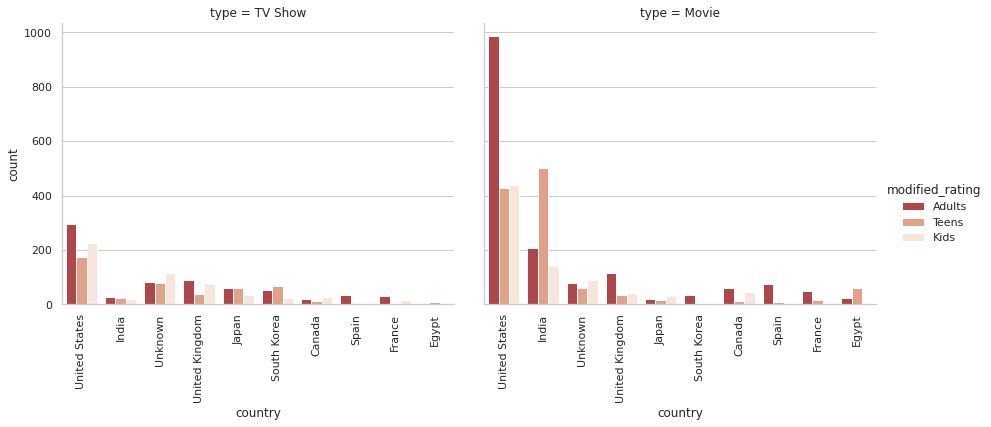

In [95]:
# Plotting the contents' count based top countries.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.country, order= nf_df.country.value_counts().index[:10], ax= ax[0], palette= 'RdGy_r')
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of top countries')
sns.countplot(nf_df.country, hue=nf_df.modified_rating, order= nf_df.country.value_counts().index[:10])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top 10 countries and their counts for differnt types of contents')
p = sns.catplot(x='country',hue='modified_rating', col='type', data=nf_df, kind='count',order= nf_df.country.value_counts().index[:10], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* We can clearly observe that United States has the more contents in both TV shows and movies.
* India is second in this list.
* The over all focus was given to the Movies when comparing with the TV shows.

**Analysis on 'release year'**

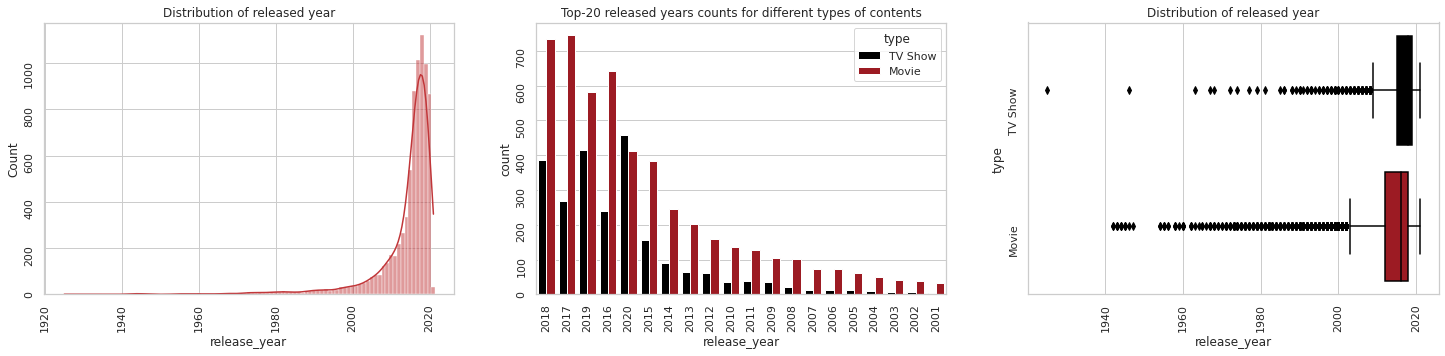

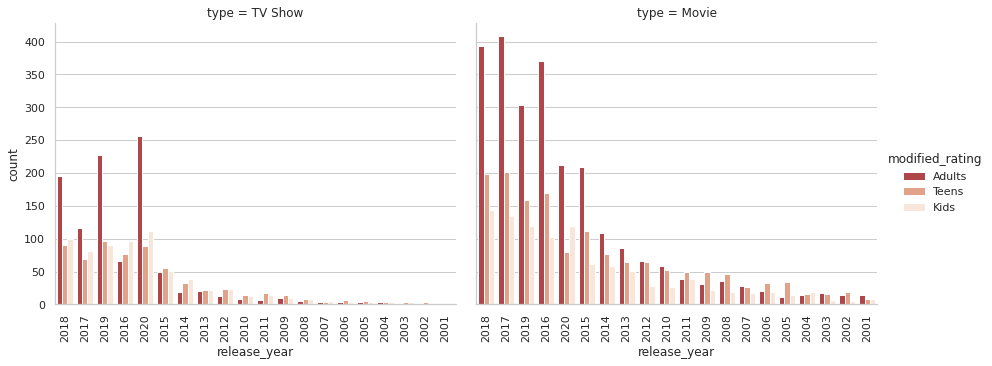

In [96]:
# Plotting release year for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x='release_year', data= nf_df, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of released year')
ax[0].set_xlabel('release_year')
sns.countplot(x= 'release_year', hue='type', data= nf_df, order= nf_df.release_year.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top-20 released years counts for different types of contents')
ax[1].set_xlabel('release_year')
sns.boxplot(x='release_year', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of released year')
p = sns.catplot(kind='count', x='release_year', hue='modified_rating', col='type', data=nf_df, order= nf_df.release_year.value_counts().index[:20],  aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* We can clearly say that 90% of the contents are released between 2015 to 2020.
* Here also we can see that most of the contents are Movie based rather than TV shows.

**Analysis on 'addded year'**

In [97]:
# Extracting the added year from the added date
nf_df['added_year']= nf_df.date_added.dt.year

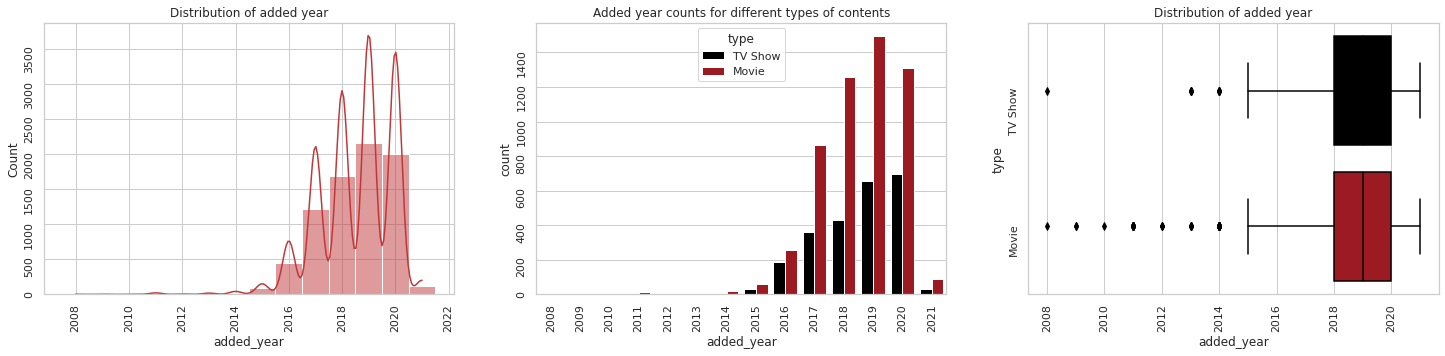

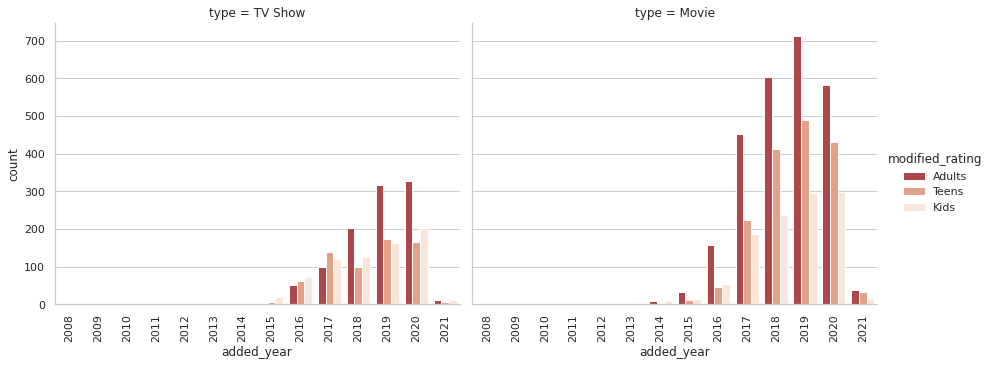

In [98]:
# Plotting added year for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x= 'added_year', data= nf_df, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of added year')
ax[0].set_xlabel('added_year')
sns.countplot(x= 'added_year', hue= 'type', data= nf_df, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Added year counts for different types of contents')
ax[1].set_xlabel('added_year')
sns.boxplot(x= 'added_year', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of added year')
p = sns.catplot(x='added_year', hue='modified_rating', col='type', data=nf_df, kind='count', aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* The results for this added year analysis has very much similar with the released year analysis.
* Most of the contents are added in the years between 2015 to 2020.
* Here also we can say that the focus has given to Movies rather than TV shows.

**Analysis on 'added month'**

In [99]:
# Extracting the added month from the added date
nf_df['added_month']= nf_df.date_added.dt.month
months= ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July', 'August', 'september', 'October', 'November', 'December']

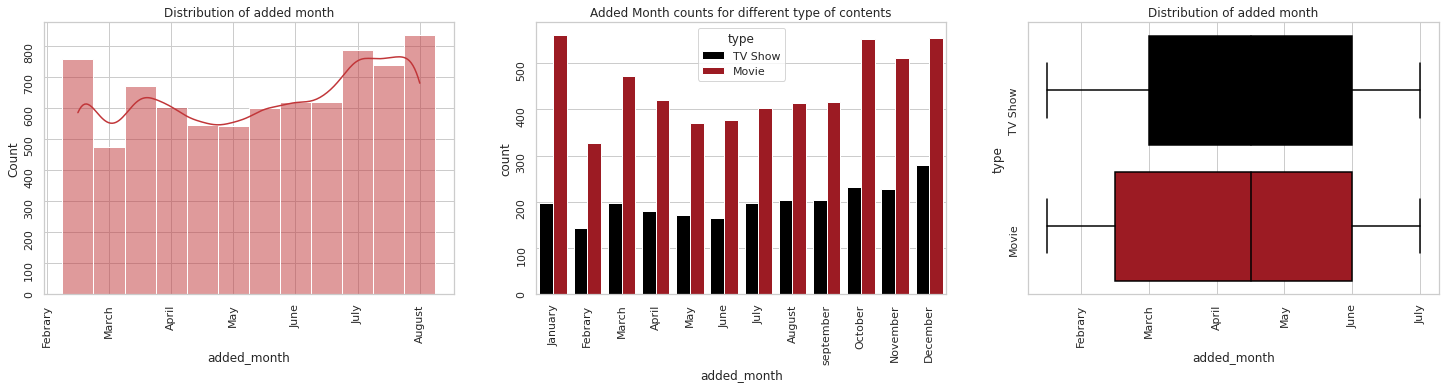

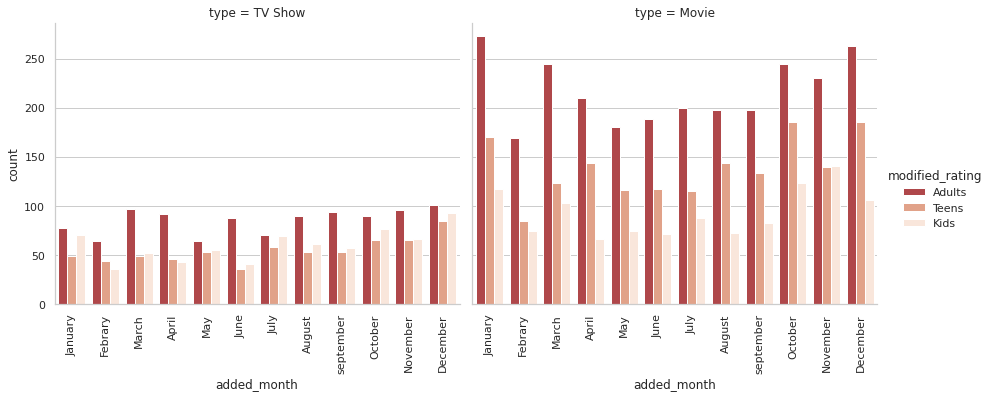

In [100]:
# Plotting added month for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(nf_df.added_month, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_xticklabels(months)
ax[0].set_title('Distribution of added month')
ax[0].set_xlabel('added_month')
sns.countplot(nf_df.added_month, hue=nf_df.type, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_xticklabels(months)
ax[1].set_title('Added Month counts for different type of contents')
ax[1].set_xlabel('added_month')
sns.boxplot(x= 'added_month', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].set_xticklabels(months)
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of added month')
p = sns.catplot(kind='count', x='added_month', hue='modified_rating', col='type', data=nf_df, aspect= 1.25)
p.set_xticklabels(labels= months, rotation=90)

**Observations:**
* All 12 months has mostly similar amount of added contents.
* Starting and ending of an year has quite higher amount of added contents when comparing with the other middle ordered months.
* Here also we can clearly see that higher amount of Movies has been added than the TV shows.

**Analysis on 'added week day'**

In [101]:
# Extracting the added day of week from the added date
nf_df['added_week_day']= nf_df.date_added.dt.dayofweek
week_days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

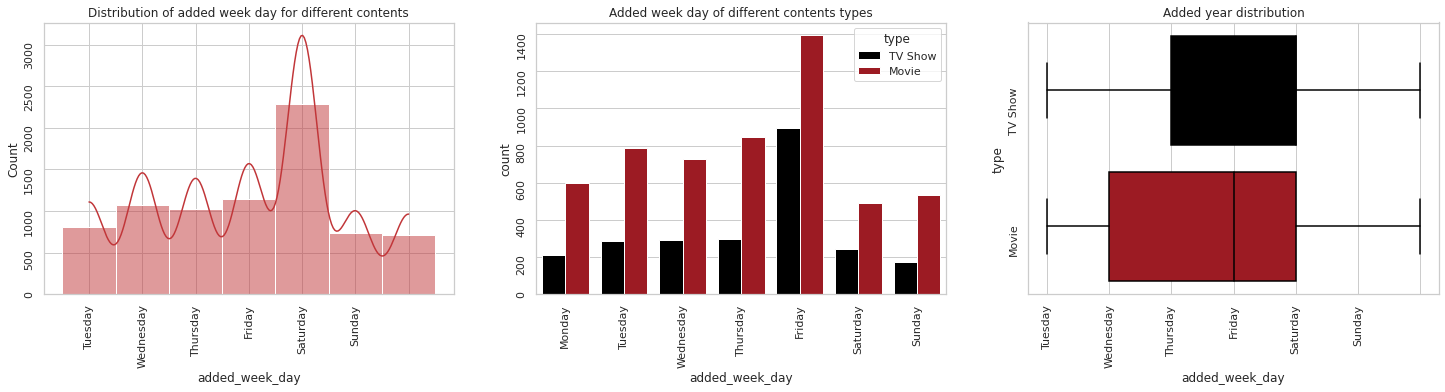

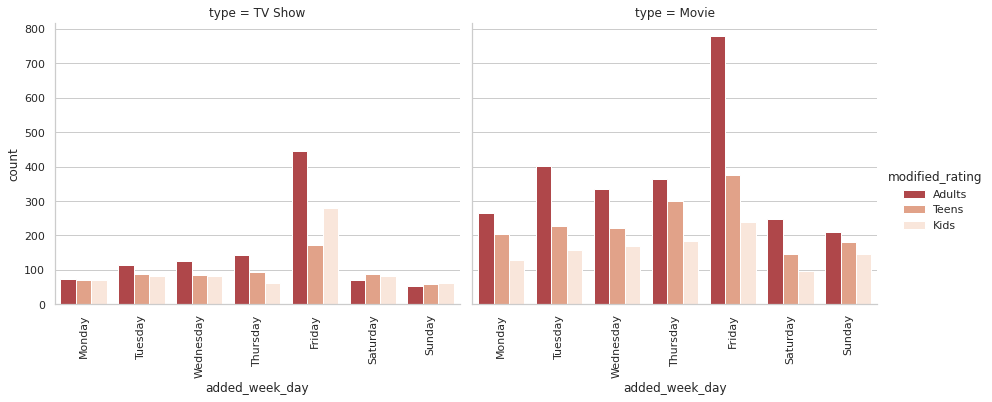

In [102]:
# Plotting added day of week for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x= 'added_week_day', data= nf_df, ax= ax[0], kde=True, discrete=True, palette= 'RdGy')
ax[0].set_xticklabels(week_days)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of added week day for different contents')
ax[0].set_xlabel('added_week_day')
sns.countplot(x= 'added_week_day', hue='type', data= nf_df, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].set_xticklabels(week_days)
ax[1].tick_params(rotation=90)
ax[1].set_title('Added week day of different contents types')
ax[1].set_xlabel('added_week_day')
sns.boxplot(x= 'added_week_day', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].set_xticklabels(week_days)
ax[2].tick_params(rotation=90)
ax[2].set_title('Added year distribution')
p = sns.catplot(kind='count', x='added_week_day', hue='modified_rating', col='type', data=nf_df, aspect= 1.25)
p.set_xticklabels(labels= week_days, rotation=90)

**Observations:**
* We can clearly observe a huge spike on Fridays, since it is the start of week-ends.
* And little less on end of the week-ends.

**Analysis on 'directors'**

Text(0.5, 0, 'director')

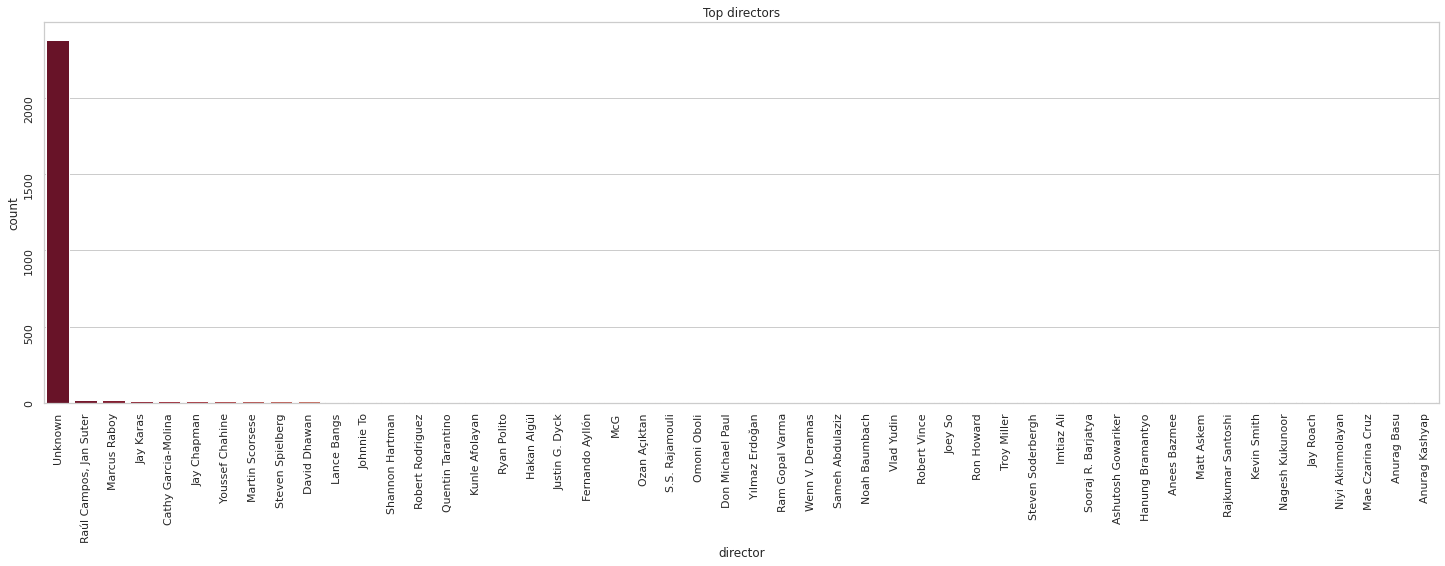

In [103]:
# Plotting directors for different available contents.
fig = plt.figure(figsize=(25,7))
ax = fig.gca()
sns.countplot(nf_df.director, order= nf_df.director.value_counts().index[:50], palette= 'RdGy')
# ax[0].set_xticklabels(week_days)
ax.tick_params(rotation=90)
ax.set_title('Top directors')
ax.set_xlabel('director')

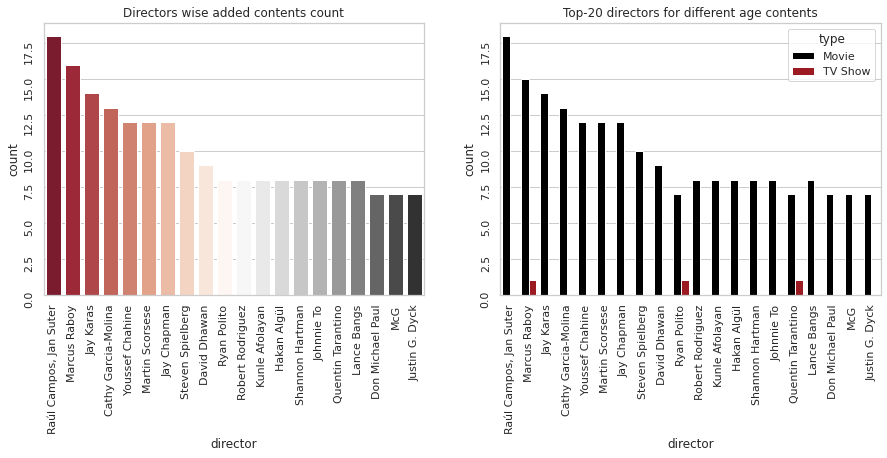

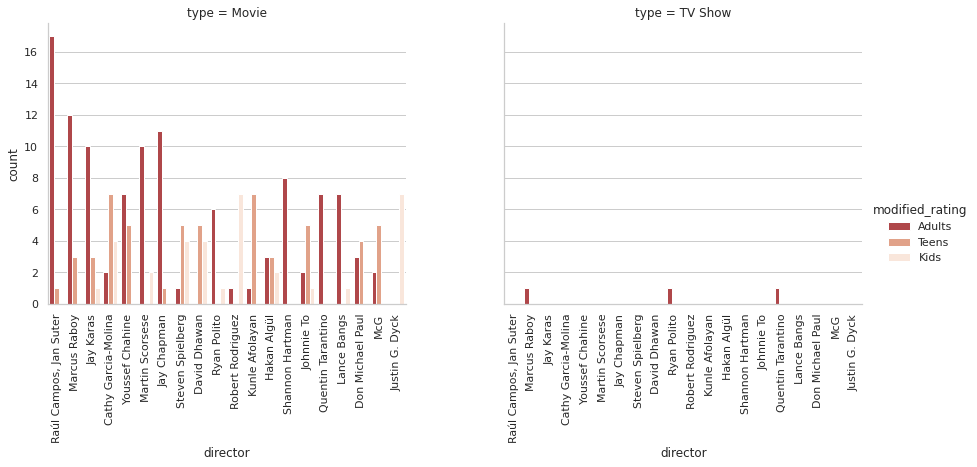

In [104]:
# Plotting directors for different available contents.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df[nf_df.director != 'Unknown'].director, order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], ax= ax[0], palette= 'RdGy')
# ax[0].set_xticklabels(week_days)
ax[0].tick_params(rotation=90)
ax[0].set_title('Directors wise added contents count')
ax[0].set_xlabel('director')
sns.countplot(x= 'director', hue='type', data= nf_df[nf_df.director != 'Unknown'], order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
# ax[1].set_xticklabels(week_days)
ax[1].tick_params(rotation=90)
ax[1].set_title('Top-20 directors for different age contents')
ax[1].set_xlabel('director')
p = sns.catplot(kind='count', x='director', hue='modified_rating', col='type', data=nf_df[nf_df.director != 'Unknown'], order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* From the first plot we can observe that most of the content directors are 'Unknown'for TV shows.
* Movies have the most of the know directors. 

**Analysis on 'cast'**

In [105]:
# Extract individual cast contributions fromm cast column
actors_dict= {}
for i, actors in nf_df.cast.iteritems():
  for actor in actors.split(', '):
    if actor not in actors_dict.keys():
      actors_dict[actor]= 1
    else:
      actors_dict[actor] += 1
actors_dict= dict(sorted(actors_dict.items() , key= lambda x: x[1], reverse = True))

print('Total number of cast in Netflix: ',len(actors_dict))

Total number of cast in Netflix:  32848


Text(0.5, 0, 'actors')

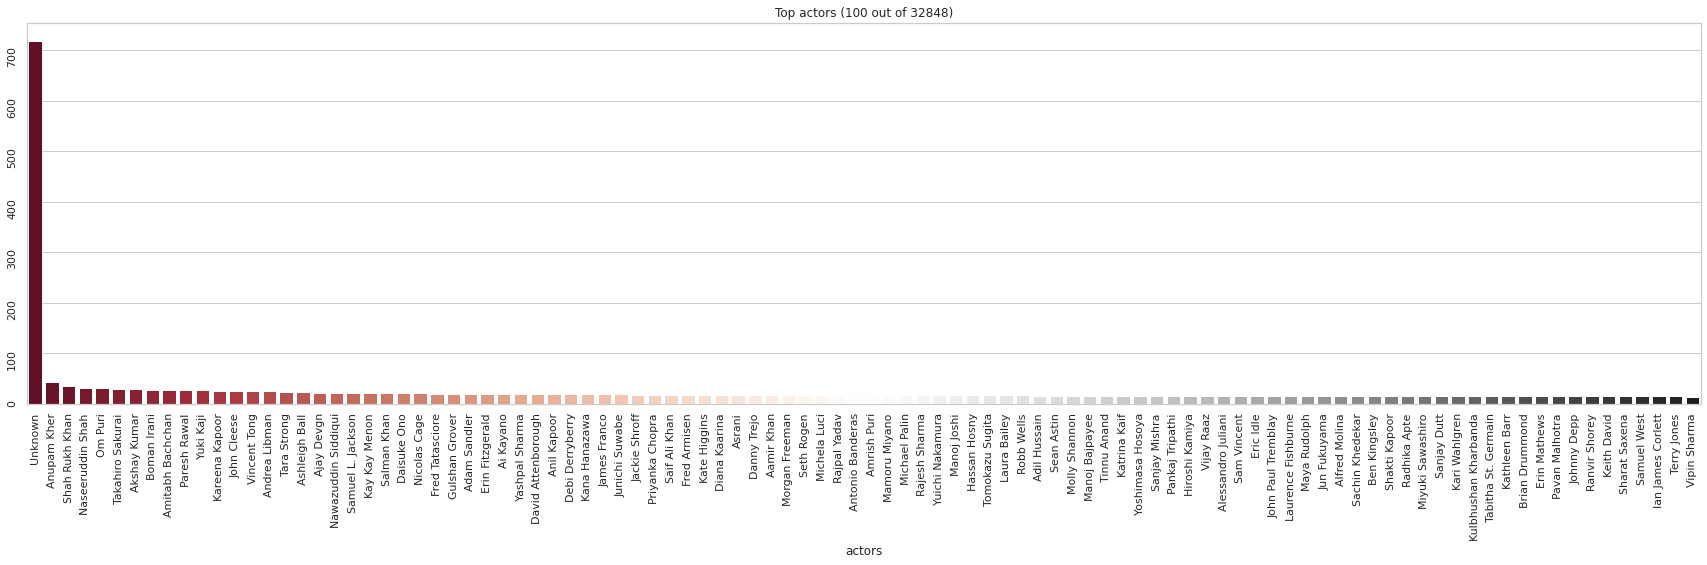

In [106]:
# Plotting directors for different available contents.
fig = plt.figure(figsize=(30,7))
ax = fig.gca()
sns.barplot(x=list(actors_dict.keys())[:100], y= list(actors_dict.values())[:100], palette= 'RdGy')
ax.tick_params(rotation=90)
ax.set_title('Top actors (100 out of 32848)')
ax.set_xlabel('actors')

**Observations:**
* For most of the contents the Cast are 'Uknown'.
* Annupam Kher has 2nd placed followed by Shah Rukh Khan.
* Akshay Kumar and Amitabh Bachchan were also in the top 10 actors list.

**Analysis on 'duaration of movies'**

In [107]:
# Extracting the total duration of the movies from the duration column.
nf_df_movie_length= nf_df.loc[nf_df.type == 'Movie', ['duration']]
nf_df_movie_length= nf_df_movie_length.duration.apply(lambda x: int(x.split()[0])).values

Text(0.5, 0, 'duration')

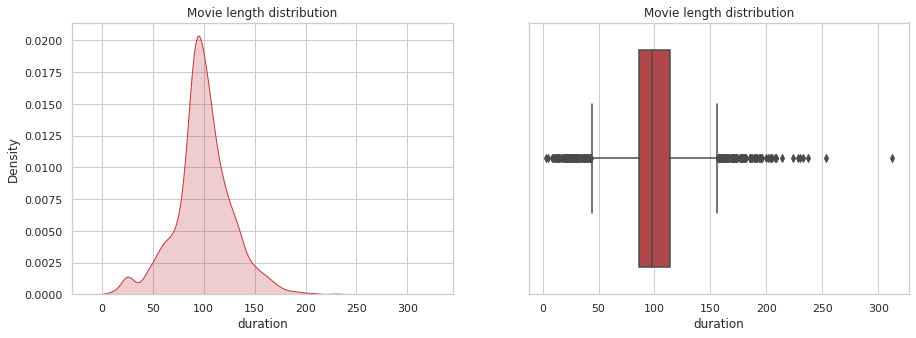

In [108]:
# Plotting Movie duration distribution.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(x= nf_df_movie_length, ax= ax[0], fill= True)
ax[0].set_title('Movie length distribution')
ax[0].set_xlabel('duration')
sns.boxplot(x= nf_df_movie_length, ax= ax[1])
ax[1].set_title('Movie length distribution')
ax[1].set_xlabel('duration in (minutes)')

**Observations:**
* More than 80% of the movies had 100+ minutes of duration.
* only less 10 % percentage of the movies are less than 50 minutes.

**Analysis on 'seasons of TV shows'**

In [109]:
# Extracting number of seasons of the TV shows from the duration column.
nf_df_tv_show_length= nf_df.loc[nf_df.type== 'TV Show', ['duration']]
nf_df_tv_show_length= nf_df_tv_show_length.duration.apply(lambda x: int(x.split()[0])).values

Text(0.5, 0, 'Seasons')

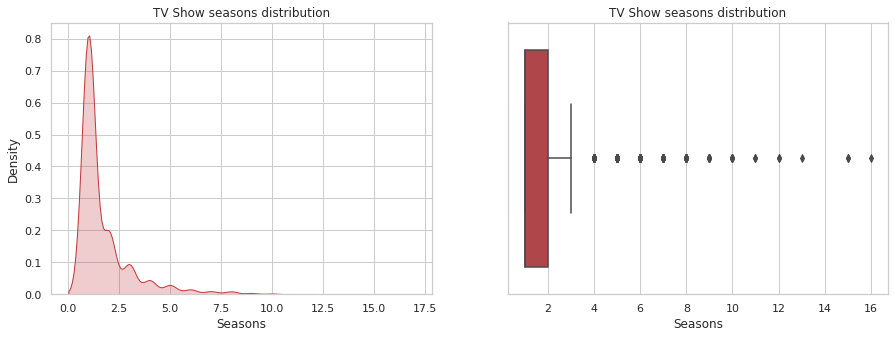

In [110]:
# Plotting TV Show Seasons distribution.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(x= nf_df_tv_show_length, ax= ax[0], fill= True)
ax[0].set_title('TV Show seasons distribution')
ax[0].set_xlabel('Seasons')
sns.boxplot(x= nf_df_tv_show_length, ax= ax[1])
ax[1].set_title('TV Show seasons distribution')
ax[1].set_xlabel('Seasons')

**Observations:**
* 95% percentage of the TV shows are having only 2 seasons.
* less than 1 percentage of the TV shows has 5+ seasons.

**Analysis on 'listed in (genres)'**

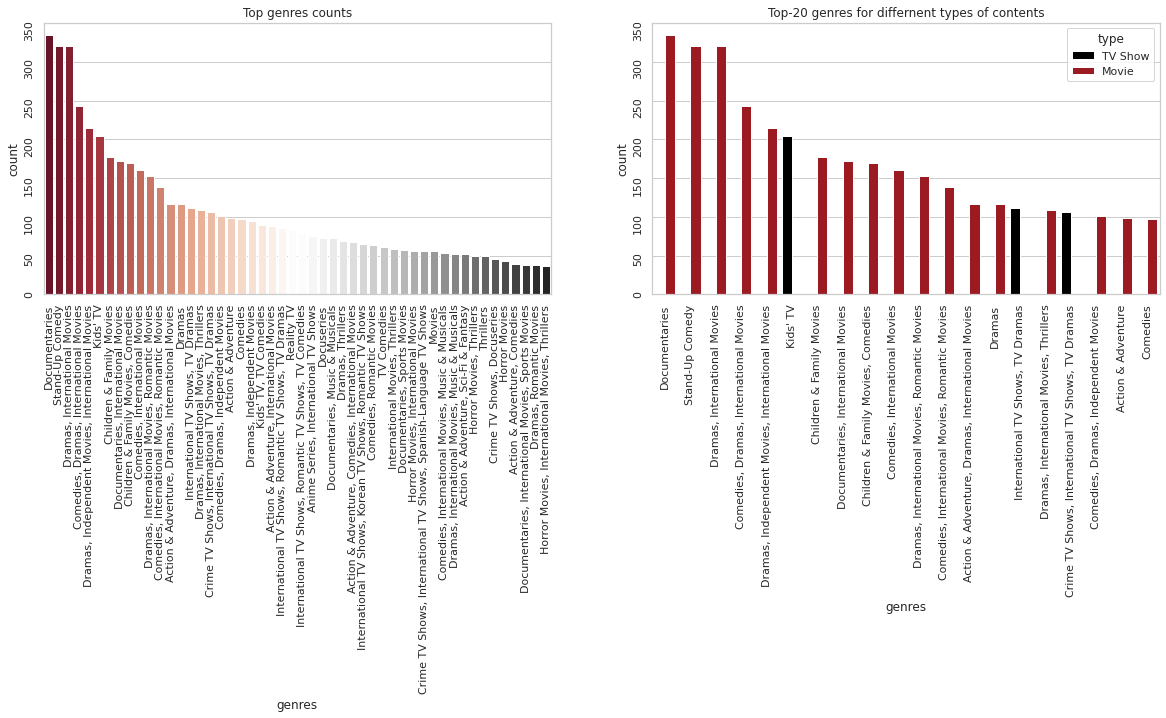

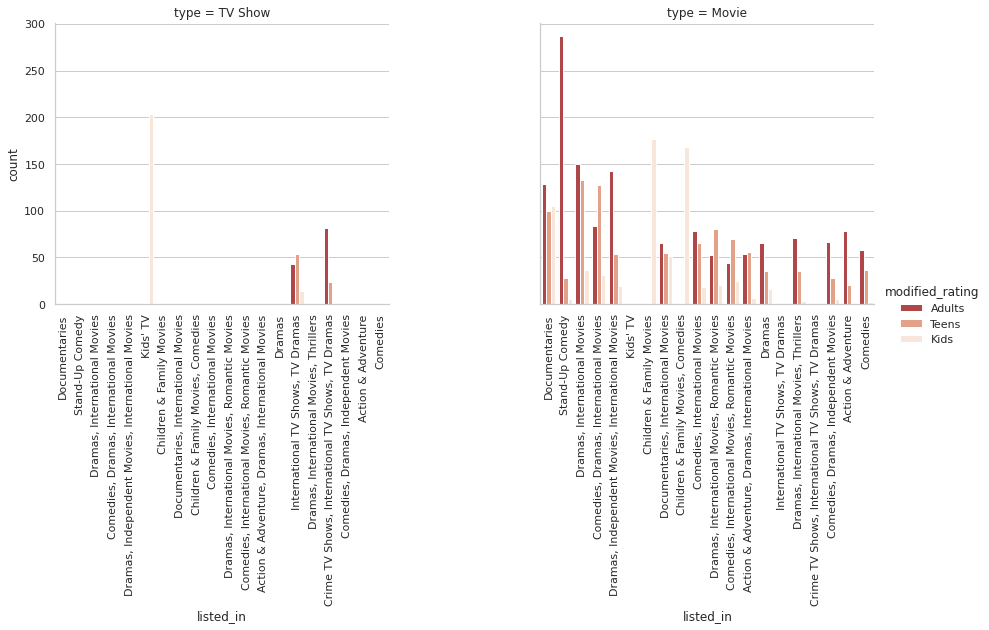

In [111]:
# Plotting different genres.
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='listed_in', data= nf_df, order= nf_df.listed_in.value_counts().index[:50], ax= ax[0], palette= 'RdGy')
ax[0].tick_params(rotation=90)
ax[0].set_title('Top genres counts')
ax[0].set_xlabel('genres')
sns.countplot(x= 'listed_in', hue='type', data= nf_df, order= nf_df.listed_in.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top-20 genres for differnent types of contents')
ax[1].set_xlabel('genres')
p = sns.catplot(kind='count', x='listed_in', hue='modified_rating', col='type', data=nf_df, order= nf_df.listed_in.value_counts().index[:20], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* Mosly movies has beed contributed in different varienties of genres.
* TV shows has mostly focusing on kids programs

**Analysis on 'title'**

In [112]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
sw_en= stopwords.words('english')
print(sw_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [114]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>>

In [115]:
import string

In [116]:
title_words_dict= {}
for i, title in nf_df.title.iteritems():
  title= ''.join([s for s in title if s not in string.punctuation])
  for word in title.split():
    if word.lower() not in sw_en:
      if word.lower() not in title_words_dict.keys():
        title_words_dict[word.lower()]= 1
      else:
        title_words_dict[word.lower()] += 1
    else:
      pass
title_words_dict= dict(sorted(title_words_dict.items(), key= lambda x: x[1], reverse= True))
print(title_words_dict)

{'love': 151, '2': 113, 'christmas': 78, 'man': 74, 'story': 67, 'life': 64, 'world': 63, 'movie': 60, 'little': 58, 'one': 54, 'time': 53, 'last': 49, 'de': 46, 'high': 45, 'live': 44, 'la': 44, 'american': 44, 'el': 43, 'black': 43, 'house': 42, 'girls': 42, 'power': 42, 'super': 38, 'day': 37, 'city': 35, 'night': 35, 'new': 35, 'game': 34, 'first': 33, 'family': 33, 'rangers': 33, '3': 32, 'good': 31, 'girl': 31, 'show': 31, 'war': 31, 'monster': 30, 'special': 30, 'go': 30, 'king': 30, 'boy': 29, 'us': 29, 'great': 29, 'school': 27, 'club': 27, 'dark': 27, 'stories': 26, 'baby': 26, 'boys': 26, 'big': 26, 'mr': 26, 'bad': 25, 'two': 25, 'legend': 25, 'killer': 25, 'friends': 25, 'days': 24, 'hai': 24, 'kill': 23, 'secret': 23, 'happy': 23, 'secrets': 23, 'kids': 23, 'tales': 22, 'next': 22, 'true': 22, 'back': 22, 'wild': 22, 'death': 22, 'heart': 21, 'ghost': 21, 'fire': 21, 'miss': 21, 'version': 21, 'monsters': 21, 'prince': 20, 'adventures': 20, 'white': 20, 'lost': 20, 'nova'

In [117]:
len(title_words_dict)

8337

In [118]:
words_freuency_in_titles_df= pd.DataFrame(title_words_dict.values(),title_words_dict.keys()).reset_index().rename(columns= {'index': 'words_in_titles', 0:'frequency'})
words_freuency_in_titles_df.head()

,words_in_titles,frequency
0,love,151
1,2,113
2,christmas,78
3,man,74
4,story,67


Text(0.5, 0, 'Words in title')

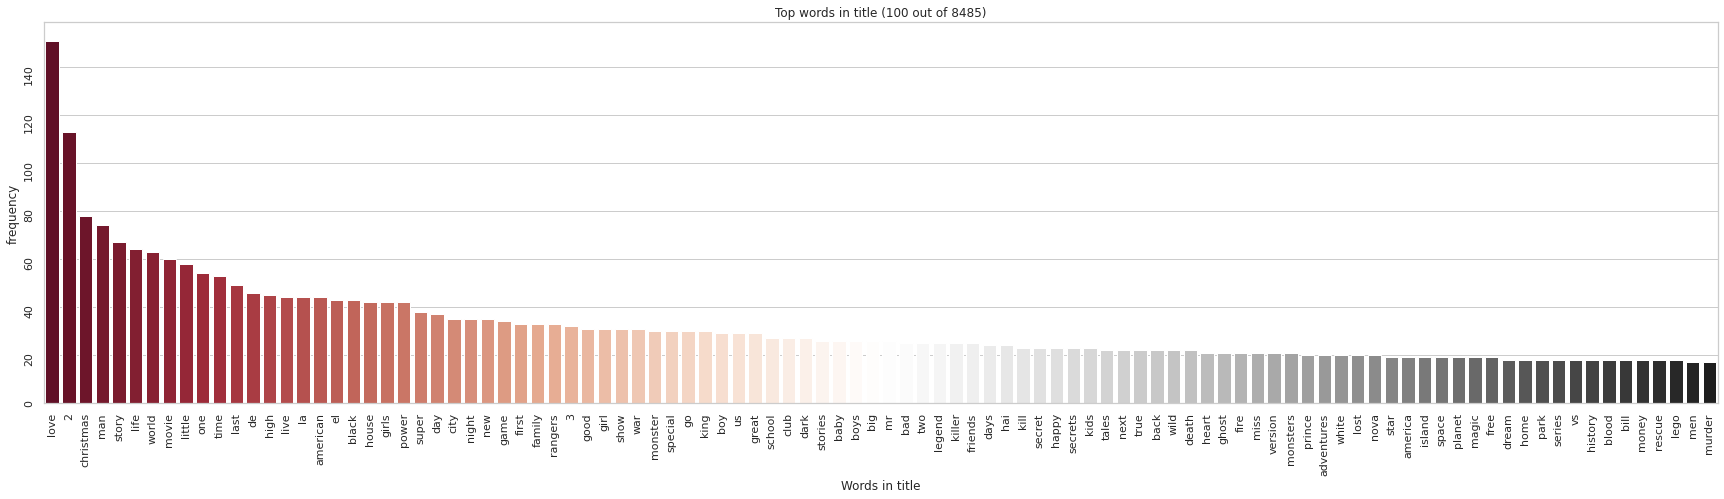

In [119]:
# Plotting Top words used in titles.
fig = plt.figure(figsize=(30,7))
ax = fig.gca()
sns.barplot(x='words_in_titles', y= 'frequency', data= words_freuency_in_titles_df, order= words_freuency_in_titles_df.words_in_titles[:100], palette= 'RdGy')
ax.tick_params(rotation=90)
ax.set_title('Top words in title (100 out of 8485)')
ax.set_xlabel('Words in title')

**Observations:**
* It gives some interesting observations.
* More than 150 titles are consisting the word **'love'**
* 80+ movies are have the words **'christmas'** and number **'2'**

**Ovear all EDA conclusion:**
* Most of the contents were added between the years 2015 - 2020.
* Most of the contents were only suitable for adults.
* Counties like United States, India, Japan, South Korea, and Canada contents were contributing a lot.
* From the overall Netflix is focusing more on **Movies** than the TV shows.


# **Analysis on text features**

## **Implementation of Natural Language Processing (NLP)**

In [120]:
# Viewing the 'listed_in' feature values
nf_df.listed_in.head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [121]:
# Viewing the 'description' feature values
nf_df.description.head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

### Text preprocessing

In [122]:
countries_dict= {}
for i, countries in nf_df.country.iteritems():
  for count in countries.split(', '):
    if count not in countries_dict.keys():
      countries_dict[count]= 1
    else:
      countries_dict[count] += 1
countries_dict_new= dict(sorted(countries_dict.items() , key= lambda x: x[1], reverse = True))

print('Total number of counties in Netflix: ',len(countries_dict_new))

Total number of counties in Netflix:  122


In [123]:
# Top countries contributions
print(countries_dict_new)

{'United States': 3290, 'India': 990, 'United Kingdom': 721, 'Unknown': 506, 'Canada': 412, 'France': 349, 'Japan': 286, 'Spain': 215, 'South Korea': 212, 'Germany': 199, 'Mexico': 154, 'China': 147, 'Australia': 143, 'Egypt': 110, 'Turkey': 108, 'Hong Kong': 102, 'Italy': 90, 'Brazil': 88, 'Taiwan': 85, 'Belgium': 85, 'Argentina': 82, 'Indonesia': 80, 'Philippines': 78, 'Nigeria': 76, 'Thailand': 65, 'South Africa': 54, 'Netherlands': 45, 'Colombia': 45, 'Denmark': 44, 'Ireland': 40, 'Singapore': 39, 'Sweden': 39, 'Poland': 35, 'United Arab Emirates': 34, 'Norway': 29, 'New Zealand': 28, 'Russia': 27, 'Israel': 26, 'Chile': 26, 'Lebanon': 26, 'Malaysia': 26, 'Pakistan': 24, 'Czech Republic': 20, 'Switzerland': 17, 'Uruguay': 14, 'Romania': 12, 'Luxembourg': 11, 'Finland': 11, 'Austria': 11, 'Peru': 10, 'Saudi Arabia': 10, 'Greece': 10, 'Iceland': 9, 'Bulgaria': 9, 'Hungary': 9, 'Jordan': 8, 'Serbia': 7, 'Qatar': 7, 'Kuwait': 7, 'Morocco': 6, 'Kenya': 5, 'Vietnam': 5, 'West Germany': 5

In [124]:
# Since huge number of counties involved we can use use most common languages for removing stop words.
common_languages= ['chinese', 'english', 'french', 'german', 'spanish', 'turkish']
all_stop_words= []
for lang in common_languages:
  all_stop_words+=stopwords.words(lang)
len(all_stop_words)

1775

In [125]:
# Creating a function for removing the punctuations and stop words from the any text
def preprocess_text(txt):
  '''this fucntion will takes a full sentence of text,
   and will remove punctions and stop words(en)'''
  translator= str.maketrans('', '', string.punctuation)
  nopunc_txt= txt.translate(translator)
  cleaned_txt= ' '.join([word.lower() for word in nopunc_txt.split() if word.lower() not in all_stop_words]) 
  return cleaned_txt

In [126]:
# Applying text preprocessing on 'listed_in' column
nf_df['listed_in']= nf_df.listed_in.apply(preprocess_text)
nf_df.listed_in.head()

0    international tv shows tv dramas tv scifi fantasy
1                          dramas international movies
2                   horror movies international movies
3    action adventure independent movies scifi fantasy
4                                               dramas
Name: listed_in, dtype: object

In [127]:
# Applying text preprocessing on 'description' column
nf_df['description']= nf_df.description.apply(preprocess_text)
nf_df.description.head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

### Implementation of Stemming

In [128]:
# Importing Snow Ball stemmer dependencies
from nltk.stem import SnowballStemmer

In [129]:
# Creating an object for Snow ball stemmer
snow_stem_en= SnowballStemmer('english')

In [130]:
# Creating a function for applying stemming
def apply_stemming(txt):
  '''This function will takes text as input and return stemmed text as output'''
  text= ' '.join([snow_stem_en.stem(word) for word in txt.split()])
  return text

In [131]:
# Applying stemming on 'listed_in' column
nf_df['listed_in']= nf_df.listed_in.apply(apply_stemming)
nf_df.listed_in.head()

0       intern tv show tv drama tv scifi fantasi
1                              drama intern movi
2                        horror movi intern movi
3    action adventur independ movi scifi fantasi
4                                          drama
Name: listed_in, dtype: object

In [132]:
# Applying stemming on 'description' column
nf_df['description']= nf_df.description.apply(apply_stemming)
nf_df.description.head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: description, dtype: object

### Implementation of Count Vectorizer

---



**words frequency analysis on 'listed_in'**

In [158]:
# Import dependencies for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [171]:
# Creating a count vectorizer object and fitting in the 'listed_in' text
count_vectorizer = CountVectorizer()
count_vectorizer.fit(netflix_df.listed_in)

# Getting the most frequently occuring words
listed_in_words_frequency= count_vectorizer.vocabulary_.items()

In [174]:
listed_in_words_frequency_dict= dict(sorted(listed_in_words_frequency, key= lambda x: x[1], reverse= True))
print(listed_in_words_frequency_dict)

{'up': 44, 'tv': 43, 'thrillers': 42, 'teen': 41, 'talk': 40, 'stand': 39, 'sports': 38, 'spirituality': 37, 'spanish': 36, 'shows': 35, 'series': 34, 'science': 33, 'sci': 32, 'romantic': 31, 'reality': 30, 'nature': 29, 'mysteries': 28, 'musicals': 27, 'music': 26, 'movies': 25, 'lgbtq': 24, 'language': 23, 'korean': 22, 'kids': 21, 'international': 20, 'independent': 19, 'horror': 18, 'fi': 17, 'features': 16, 'fantasy': 15, 'family': 14, 'faith': 13, 'dramas': 12, 'docuseries': 11, 'documentaries': 10, 'cult': 9, 'crime': 8, 'comedy': 7, 'comedies': 6, 'classic': 5, 'children': 4, 'british': 3, 'anime': 2, 'adventure': 1, 'action': 0}


In [177]:
listed_in_word_df= pd.DataFrame(listed_in_words_frequency_dict.items()).rename(columns= {0: 'word', 1: 'count'})
listed_in_word_df.head()

,word,count
0,up,44
1,tv,43
2,thrillers,42
3,teen,41
4,talk,40


Text(0.5, 1.0, "Distribution of top words in 'listed_in'")

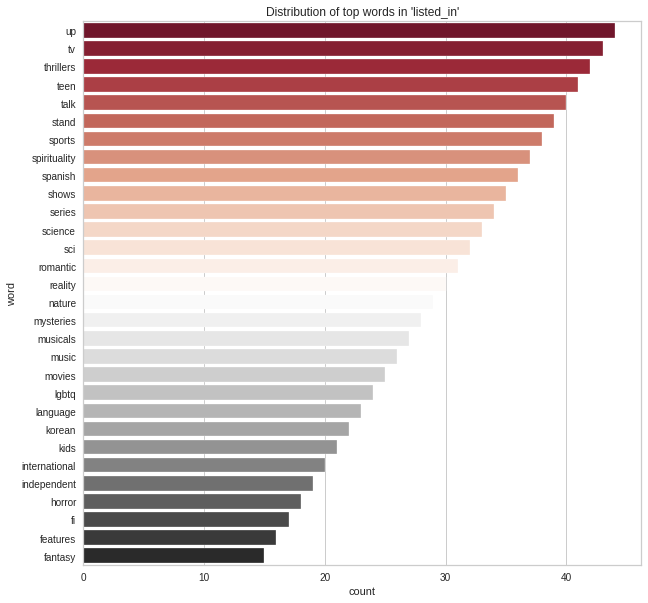

In [184]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.barplot(x='count', y= 'word', data= listed_in_word_df, order= listed_in_word_df.word[:30], palette= 'RdGy')
ax.set_title("Distribution of top words in 'listed_in'")

**Observations:**
* 'Up is the most used word in the listed in(genres).
* Words like TV, Thrillers, teen, talk sports science and romatic are having considerable amount of counts.
* Most of the top words are belongs to English language.

**words frequency analysis on 'description'**

In [180]:
# Creating a count vectorizer object and fitting in the 'description' text
count_vectorizer = CountVectorizer()
count_vectorizer.fit(netflix_df.description)

# Getting the most frequently occuring words
description_words_frequency= count_vectorizer.vocabulary_.items()

In [181]:
description_words_frequency_dict= dict(sorted(description_words_frequency, key= lambda x: x[1], reverse= True))
print(description_words_frequency_dict)

{'şeref': 18167, 'ōarai': 18166, 'łukasz': 18165, 'über': 18164, 'ömer': 18163, 'émile': 18162, 'ángel': 18161, 'álvaro': 18160, 'álex': 18159, 'zé': 18158, 'zurich': 18157, 'zumbo': 18156, 'zulu': 18155, 'zuhu': 18154, 'zuckerberg': 18153, 'zoé': 18152, 'zozo': 18151, 'zoya': 18150, 'zorro': 18149, 'zordon': 18148, 'zoologist': 18147, 'zoo': 18146, 'zones': 18145, 'zone': 18144, 'zombies': 18143, 'zombie': 18142, 'zola': 18141, 'zoids': 18140, 'zoey': 18139, 'zoe': 18138, 'zodiac': 18137, 'zixin': 18136, 'zisman': 18135, 'zirkus': 18134, 'zips': 18133, 'zippy': 18132, 'zipper': 18131, 'zip': 18130, 'zion': 18129, 'zin': 18128, 'zimmer': 18127, 'zimbabwe': 18126, 'zim': 18125, 'zika': 18124, 'zig': 18123, 'zhi': 18122, 'zhen': 18121, 'zhang': 18120, 'zhan': 18119, 'zha': 18118, 'zev': 18117, 'zeus': 18116, 'zesty': 18115, 'zero': 18114, 'zeo': 18113, 'zenos': 18112, 'zenko': 18111, 'zenithian': 18110, 'zenith': 18109, 'zen': 18108, 'zemdegs': 18107, 'zeliha': 18106, 'zeina': 18105, 'ze

In [182]:
description_word_df= pd.DataFrame(description_words_frequency_dict.items()).rename(columns= {0: 'word', 1: 'count'})
description_word_df.head()

,word,count
0,şeref,18167
1,ōarai,18166
2,łukasz,18165
3,über,18164
4,ömer,18163


Text(0.5, 1.0, "Distribution of top words in 'description'")

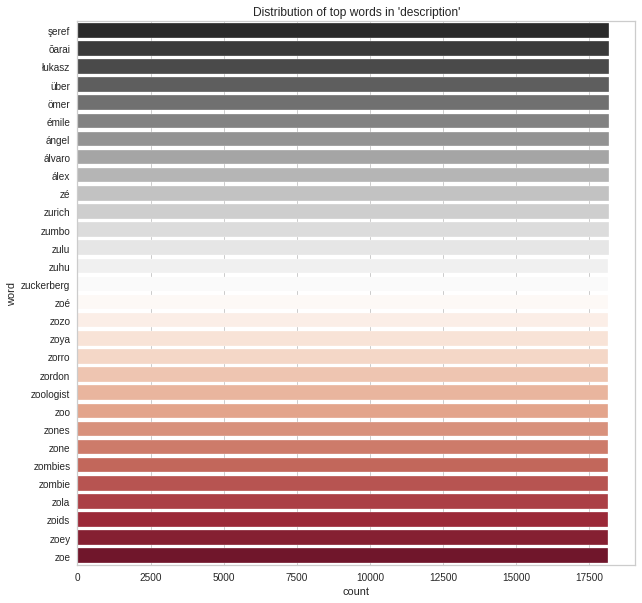

In [185]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.barplot(x='count', y= 'word', data= description_word_df, order= description_word_df.word[:30], palette= 'RdGy_r')
ax.set_title("Distribution of top words in 'description'")

**Observations:**
* It showing some interesting results.
* Most of the words are used more than 18000 times.
* Very less english words are contributed in the top frequently used words in description.